# MLP i szeregi czasowe

### Zadanie do wykonania:
1. Należy zbudować sztuczną sieć neuronową, której zadaniem będzie:
- Obliczenie przewidywanego kursu dolara amerykańskiego z wyprzedzeniem o dwa dni w oparciu o najlepiej skorelowane z kursem dolara, kursy innych walut.
Do uczenia sieci należy wykorzystać średnie kursy walut zamieszczone w pliku „Kursy Walut 2007”.

    Jako rozwiązanie zadania oprócz użytego kodu należy przesłać pisemny raport z wykonania zadania obejmujący:

- opis architektury sieci: jakie wejścia zostały wybrane, jakie wyjście,

- opis budowy zbioru do uczenia sieci. Jak powstał ten zbiór ?

- wnioski .

- do rozwiązania proszę wykorzystać pakiet AMORE

2. Na podstawie zbioru Bike-Sharing wykonać predykcję temperatury przy pomocy sieci neuronowej Elmana oraz Jacksona

Zadanie 1.

Aby wykonać predykcję kursu dolara amerykańskiego z wyprzedzeniem o dwa dni, należy zmienić aktualny zbiór tzn, na podstawie aktualnych danych dnia aktualnego przypisać zmienną objaśnianą z dnia o dwa dni do przodu. 

In [ ]:
# Wczytanie zbioru danych 
library(readxl)
library(RSNNS)
library(quantmod)
setwd("3/")
kursy <- read_excel("2007.xls", sheet="Sheet2")

In [5]:
kursy<-kursy[-1,]
kursy<-kursy[ ,-27]
head(kursy)


data,1 USD,1 AUD,1 HKD,1 CAD,1 EUR,100 HUF,1 CHF,1 CYP,1 GBP,⋯,1 BGN,1 MTL,1 LTL,1 LVL,1 RON,1 ZAR,1 RUB,1 XDR,Nr tabeli,...29
<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
2007-01-03,2.887,2.2970000000000002,0.37419999999999998,2.5076999999999998,3.8311999999999999,1.5185999999999999,2.3841999999999999,6.6284000000000001,5.7062999999999997,⋯,NA,8.9253,1.1095999999999999,5.4954999999999998,NA,0.41670000000000001,0.1105,4.3716999999999997,252,/A/NBP/2006
2007-01-04,2.9325000000000001,2.2902999999999998,0.37059999999999998,2.4756999999999998,3.8279000000000001,1.5236000000000001,2.3763999999999998,6.6204000000000001,5.6836000000000002,⋯,NA,8.9155999999999995,1.1086,5.4821,NA,0.41549999999999998,0.1104,4.3726000000000003,1,/A/NBP/2007
2007-01-05,2.9733000000000001,2.2978000000000001,0.37080000000000002,2.472,3.827,1.5238,2.3715999999999999,6.6204999999999998,5.6886000000000001,⋯,NA,8.9155999999999995,1.1084000000000001,5.4808000000000003,NA,0.41880000000000001,0.1103,4.3715000000000002,2,/A/NBP/2007
2007-01-08,2.9788000000000001,2.3010000000000002,0.37640000000000001,2.4996999999999998,3.8454999999999999,1.5257000000000001,2.3820000000000001,6.6520000000000001,5.6974999999999998,⋯,NA,8.9575999999999993,1.1136999999999999,5.5113000000000003,NA,0.41660000000000003,0.1109,4.3747999999999996,3,/A/NBP/2007
2007-01-09,2.9647000000000001,2.3313999999999999,0.38169999999999998,2.5255999999999998,3.8935,1.5278,2.4201000000000001,6.7350000000000003,5.7710999999999997,⋯,NA,9.0693999999999999,1.1275999999999999,5.5785,NA,0.41520000000000001,0.11269999999999999,4.4532999999999996,4,/A/NBP/2007
2007-01-10,2.9943,2.3210000000000002,0.38219999999999998,2.5384000000000002,3.8754,1.5247999999999999,2.4096000000000002,6.7042999999999999,5.7567000000000004,⋯,NA,9.0273000000000003,1.1224000000000001,5.5533000000000001,NA,0.40999999999999998,0.1129,4.4413999999999998,5,/A/NBP/2007


In [6]:
fill_na_with_mean <- function(df, columns) {
  for (col in columns) {
    col_mean <- mean(df[[col]], na.rm = TRUE)
    df[[col]][is.na(df[[col]])] <- col_mean
  }
  return(df)
}

In [ ]:
library("dplyr")
cols_to_convert <- 2:25
kursy_NA <- kursy %>%
  mutate_at(vars(cols_to_convert), as.numeric)
kursy_NA<-fill_na_with_mean(kursy_NA,19)
kursy_NA<-fill_na_with_mean(kursy_NA,23)


In [8]:
head(kursy_NA)

data,1 USD,1 AUD,1 HKD,1 CAD,1 EUR,100 HUF,1 CHF,1 CYP,1 GBP,⋯,1 BGN,1 MTL,1 LTL,1 LVL,1 RON,1 ZAR,1 RUB,1 XDR,Nr tabeli,...29
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
2007-01-03,2.8870,2.2970,0.3742,2.5077,3.8312,1.5186,2.3842,6.6284,5.7063,⋯,1.917365,8.9253,1.1096,5.4955,1.132681,0.4167,0.1105,4.3716999999999997,252,/A/NBP/2006
2007-01-04,2.9325,2.2903,0.3706,2.4757,3.8279,1.5236,2.3764,6.6204,5.6836,⋯,1.917365,8.9156,1.1086,5.4821,1.132681,0.4155,0.1104,4.3726000000000003,1,/A/NBP/2007
2007-01-05,2.9733,2.2978,0.3708,2.4720,3.8270,1.5238,2.3716,6.6205,5.6886,⋯,1.917365,8.9156,1.1084,5.4808,1.132681,0.4188,0.1103,4.3715000000000002,2,/A/NBP/2007
2007-01-08,2.9788,2.3010,0.3764,2.4997,3.8455,1.5257,2.3820,6.6520,5.6975,⋯,1.917365,8.9576,1.1137,5.5113,1.132681,0.4166,0.1109,4.3747999999999996,3,/A/NBP/2007
2007-01-09,2.9647,2.3314,0.3817,2.5256,3.8935,1.5278,2.4201,6.7350,5.7711,⋯,1.917365,9.0694,1.1276,5.5785,1.132681,0.4152,0.1127,4.4532999999999996,4,/A/NBP/2007
2007-01-10,2.9943,2.3210,0.3822,2.5384,3.8754,1.5248,2.4096,6.7043,5.7567,⋯,1.917365,9.0273,1.1224,5.5533,1.132681,0.4100,0.1129,4.4413999999999998,5,/A/NBP/2007


In [9]:
library(corrplot)

Warning message:
"pakiet 'corrplot' został zbudowany w wersji R 4.3.3"
corrplot 0.92 loaded



In [10]:
selected_col<-kursy_NA[,2:25]
cor_matrix <- cor(selected_col)

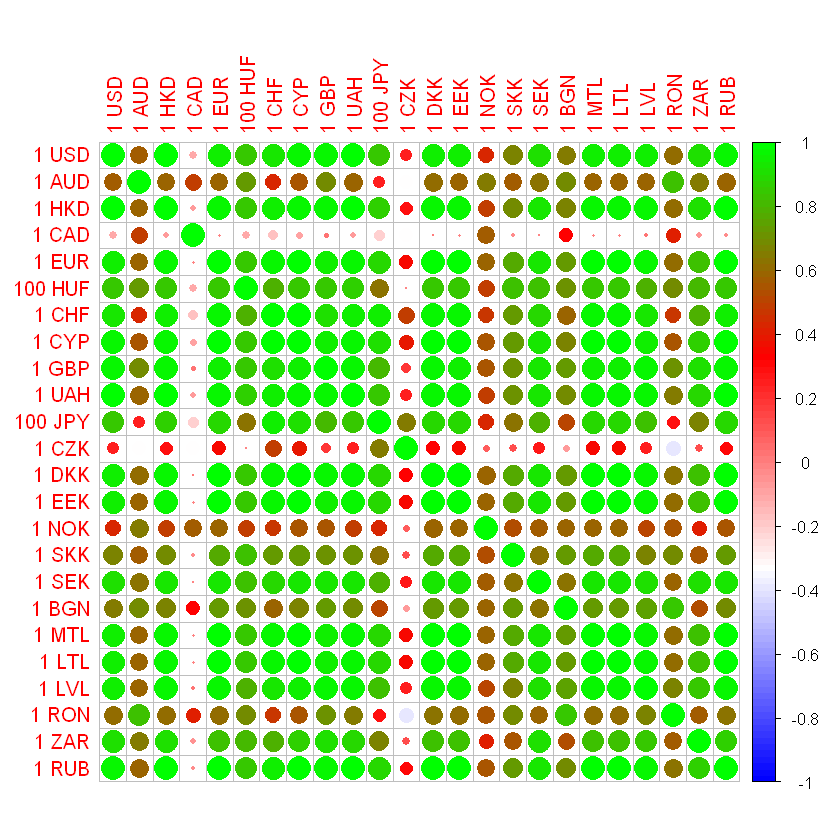

In [11]:
corrplot(cor_matrix, method = "circle",  col = colorRampPalette(c("blue", "white", "red","green"))(100))


Silna korelacja zachodzi między USD, a:
- HKD * euro
- EUR
- CHF * euro
- CYP * euro 
- GBP ** euro
- UAH * euro
- DKK * euro 
- EEK * euro
- SEK **euro
- MTL * euro
- LTL * euro
- LVL * euro
- RUB * euro

Silna korelacja występuje między EUR, a:
- HKD * euro
- CHF * euro
- CYP * euro 
- UAH * euro
- DKK * euro 
- EEK * euro
- MTL * euro
- LTL * euro
- LVL * euro
- RUB * euro

, zatem może wyliminować te waluty jako zmienne objaśniające. Model sieci neuronowej będzie budowany w oparciu o waluty:
- EUR
- GBP
- SEK

Podział zbioru na dane treninogowe i walidacyjne

In [12]:
head(selected_col)

1 USD,1 AUD,1 HKD,1 CAD,1 EUR,100 HUF,1 CHF,1 CYP,1 GBP,1 UAH,⋯,1 NOK,1 SKK,1 SEK,1 BGN,1 MTL,1 LTL,1 LVL,1 RON,1 ZAR,1 RUB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.8870,2.2970,0.3742,2.5077,3.8312,1.5186,2.3842,6.6284,5.7063,0.5760,⋯,0.4635,0.1109,0.4234,1.917365,8.9253,1.1096,5.4955,1.132681,0.4167,0.1105
2.9325,2.2903,0.3706,2.4757,3.8279,1.5236,2.3764,6.6204,5.6836,0.5741,⋯,0.4673,0.1112,0.4247,1.917365,8.9156,1.1086,5.4821,1.132681,0.4155,0.1104
2.9733,2.2978,0.3708,2.4720,3.8270,1.5238,2.3716,6.6205,5.6886,0.5715,⋯,0.4653,0.1114,0.4248,1.917365,8.9156,1.1084,5.4808,1.132681,0.4188,0.1103
2.9788,2.3010,0.3764,2.4997,3.8455,1.5257,2.3820,6.6520,5.6975,0.5834,⋯,0.4655,0.1118,0.4250,1.917365,8.9576,1.1137,5.5113,1.132681,0.4166,0.1109
2.9647,2.3314,0.3817,2.5256,3.8935,1.5278,2.4201,6.7350,5.7711,0.5878,⋯,0.4696,0.1127,0.4280,1.917365,9.0694,1.1276,5.5785,1.132681,0.4152,0.1127
2.9943,2.3210,0.3822,2.5384,3.8754,1.5248,2.4096,6.7043,5.7567,0.5893,⋯,0.4685,0.1124,0.4273,1.917365,9.0273,1.1224,5.5533,1.132681,0.4100,0.1129


In [13]:
zmienne_objasniajace<-c("data","1 EUR", "1 GBP", "1 SEK","1 USD")
kursy_data<-kursy_NA[zmienne_objasniajace]
kursy_data$data<-as.numeric(kursy_data$data)
kursy_data$data<-NULL
indices <- sample(seq_len(nrow(kursy_data)))
n <- nrow(kursy_data)
train_indices <- round(0.60 * n)
validate_indices <- round(0.40 * n)

In [14]:
kursy_train <- kursy_data[indices[1:train_indices], ]
kursy_valid <- kursy_data[indices[(train_indices + 1):(train_indices + validate_indices)], ]

In [15]:
head(kursy_train)

1 EUR,1 GBP,1 SEK,1 USD
<dbl>,<dbl>,<dbl>,<dbl>
3.6159,5.0410,0.3816,2.5168
3.8125,5.6486,0.4112,2.7619
3.7735,5.5755,0.4075,2.7641
3.9031,5.6938,0.4194,2.9330
3.7859,5.4442,0.4076,2.6847
3.7755,5.5756,0.4056,2.8507


In [62]:
y_train<-kursy_train$"1 USD"
kursy_train$"1 USD"<-NULL
y_valid<-kursy_valid$"1 USD"
kursy_valid$"1 USD"<-NULL
print(dim(kursy_train)) 
print(dim(kursy_valid))
print(is.vector(y_train))  
print(is.vector(y_valid))

[1] 151   3
[1] 100   3
[1] TRUE
[1] TRUE


In [176]:
library(AMORE)
net <- newff(
  n.neurons = c(ncol(kursy_train),30, 30,30,30, 1), 
 learning.rate.global=1e-3, 
momentum.global=0.99,#0.9
  error.criterium="TAO", 
  Stao=NA,
 hidden.layer="tansig",
 output.layer="purelin", 
 method="ADAPTgdwm")

In [177]:
result <- train(
  net, 
  kursy_train, 
  y_train, 
  kursy_valid, 
  y_valid,
  error.criterium = "LMS", 
  report = TRUE, 
  show.step = 200, 
  n.shows = 30
)

index.show: 1 LMS 	TRAIN: 0.00294607879543094 	VAL: 0.00381885606159111 	 BEST NET
index.show: 2 LMS 	TRAIN: 0.00258038954878312 	VAL: 0.00318568896568842 	 BEST NET
index.show: 3 LMS 	TRAIN: 0.00267711203858146 	VAL: 0.00316892108670253 	 BEST NET
index.show: 4 LMS 	TRAIN: 0.00308668408146533 	VAL: 0.00392413266187045 
index.show: 5 LMS 	TRAIN: 0.00286569897983648 	VAL: 0.0036322960946679 
index.show: 6 LMS 	TRAIN: 0.00277040387298647 	VAL: 0.00347846112246288 
index.show: 7 LMS 	TRAIN: 0.00280928442979896 	VAL: 0.00356486591537778 
index.show: 8 LMS 	TRAIN: 0.00253205428134142 	VAL: 0.00327699546665943 
index.show: 9 LMS 	TRAIN: 0.00228048736906459 	VAL: 0.00294313374495388 	 BEST NET
index.show: 10 LMS 	TRAIN: 0.00211422090287034 	VAL: 0.00271226362456124 	 BEST NET
index.show: 11 LMS 	TRAIN: 0.00199129216966065 	VAL: 0.00253676182437886 	 BEST NET
index.show: 12 LMS 	TRAIN: 0.00189237029405693 	VAL: 0.00239369584685442 	 BEST NET
index.show: 13 LMS 	TRAIN: 0.00180886367777299 	VAL:

In [199]:
WYSN<-sim(result$net,kursy_valid)

wynik<- data.frame(Index = 1:length(y_valid),Rzeczywiste =y_valid,Predykowane = WYSN)
print(wynik)

    Index Rzeczywiste Predykowane
1       1      2.4589    2.511371
2       2      2.9637    2.954723
3       3      2.7595    2.787174
4       4      2.7894    2.832006
5       5      2.4857    2.514379
6       6      2.7615    2.771967
7       7      3.0145    2.963812
8       8      2.7800    2.860262
9       9      2.8074    2.831867
10     10      2.7451    2.807975
11     11      2.8550    2.849777
12     12      2.7619    2.845346
13     13      2.9943    2.927754
14     14      2.7549    2.759980
15     15      2.9620    2.948170
16     16      2.8338    2.835209
17     17      2.7641    2.785829
18     18      2.8229    2.811525
19     19      2.7008    2.709799
20     20      2.8446    2.841276
21     21      2.8870    2.885230
22     22      2.7280    2.737947
23     23      2.7126    2.797859
24     24      2.7593    2.777081
25     25      2.8817    2.888606
26     26      2.4373    2.468508
27     27      2.7755    2.765142
28     28      2.7223    2.738627
29     29     

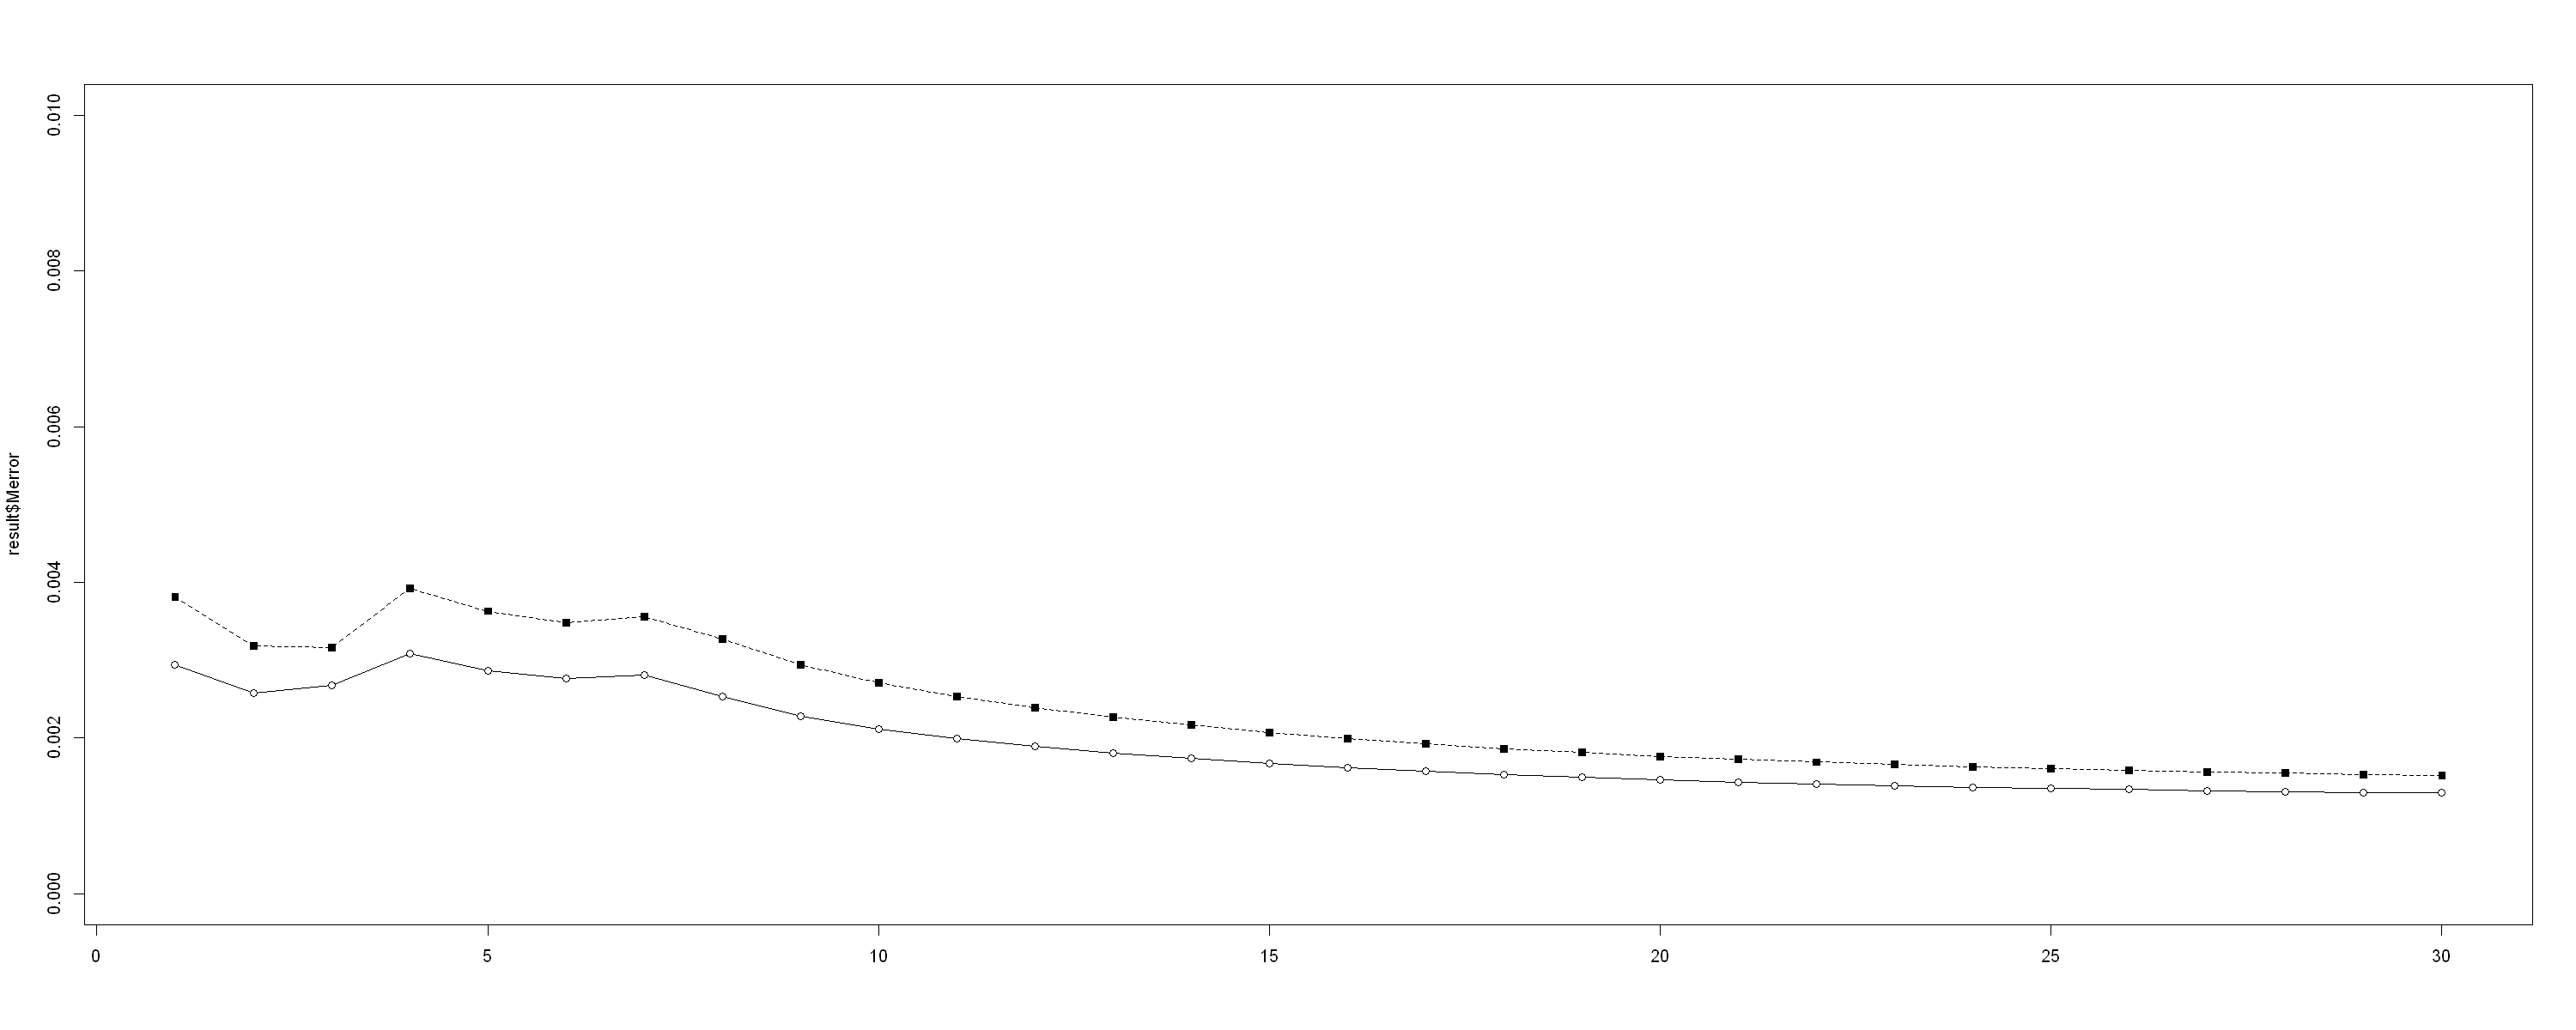

In [213]:
matplot(result$Merror, pch=21:23, bg=c("white",  "black"), type="o",col="black", xlim=c(1, 30), ylim=c(0,0.01))


In [165]:
mse <- function(actual, predicted) {
  mean((actual - predicted)^2)
}

rmse <- function(actual, predicted) {
  sqrt(mse(actual, predicted))
}

mae <- function(actual, predicted) {
  mean(abs(actual - predicted))
}

r_squared <- function(actual, predicted) {
  ss_res <- sum((actual - predicted)^2)
  ss_tot <- sum((actual - mean(actual))^2)
  1 - (ss_res / ss_tot)
}

In [180]:
mse_value <- mse(y_valid, WYSN)
rmse_value <- rmse(y_valid, WYSN)
mae_value <- mae(y_valid, WYSN)
r_squared_value <- r_squared(y_valid, WYSN)

cat("Mean Squared Error (MSE):", mse_value, "\n")
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")
cat("Mean Absolute Error (MAE):", mae_value, "\n")
cat("R-squared:", r_squared_value, "\n")

Mean Squared Error (MSE): 0.001518189 
Root Mean Squared Error (RMSE): 0.03896395 
Mean Absolute Error (MAE): 0.03023289 
R-squared: 0.9418192 


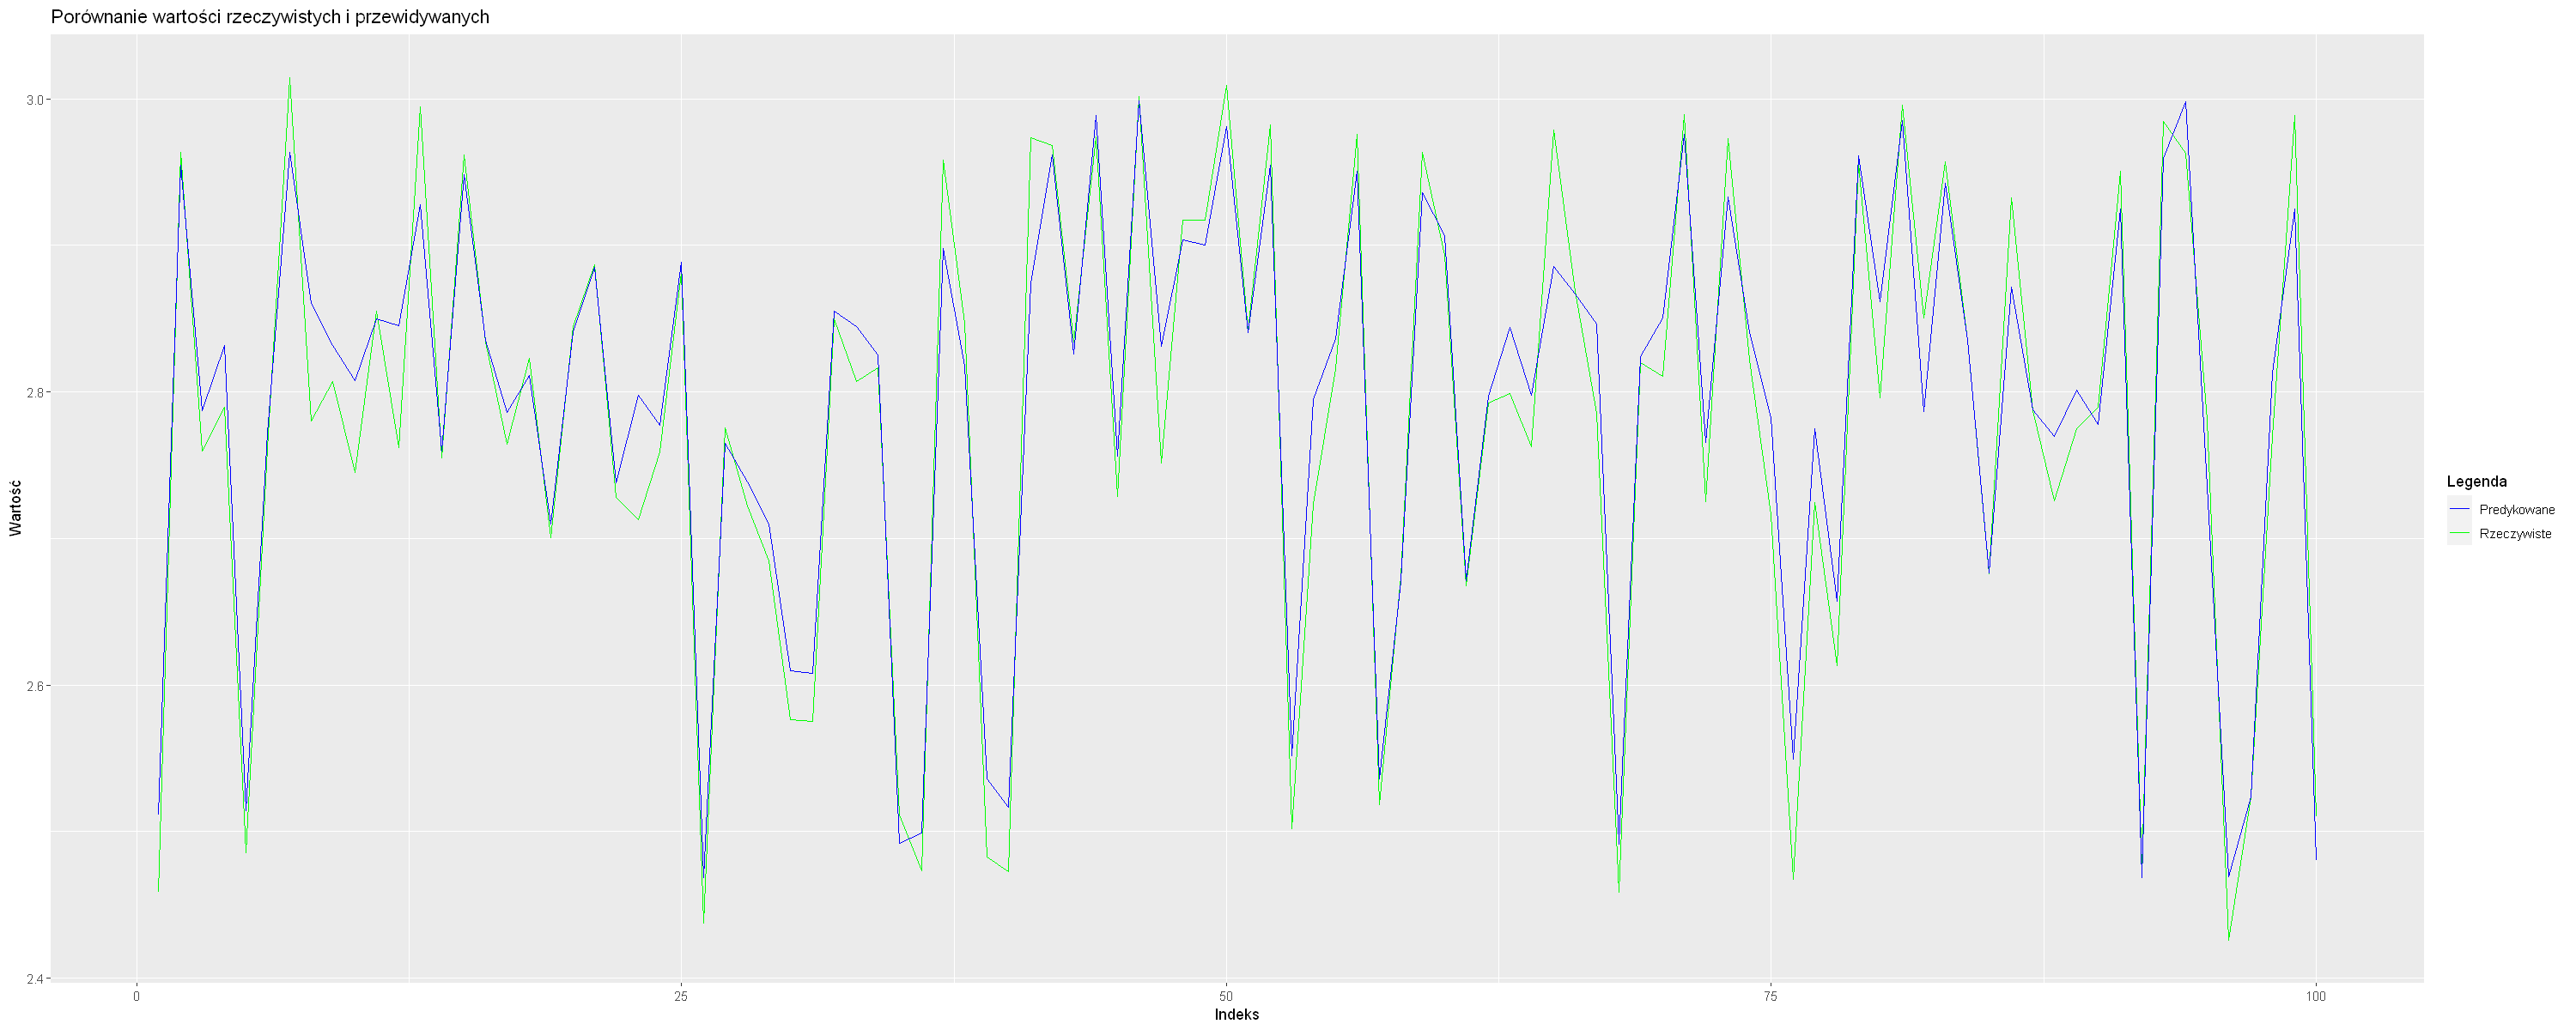

In [209]:
library(ggplot2)
options(repr.plot.width=25, repr.plot.height=10)
ggplot(wynik, aes(x = Index)) +
  geom_line(aes(y = Rzeczywiste, color = "Rzeczywiste")) +   
  geom_line(aes(y = Predykowane, color = "Predykowane")) +  
  labs(title = "Porównanie wartości rzeczywistych i przewidywanych",
       x = "Indeks",
       y = "Wartość") +
  scale_color_manual(values = c("Rzeczywiste" = "green", "Predykowane" = "blue"),
                     name = "Legenda")

Opis architektury sieci: jakie wejścia zostały wybrane, jakie wyjście:
 - wejściami do sieci neurnowej zostały EURO, FUNT SZTERLING, KORONA SZWEDZKA
 - wyjściem sieci nuronowej został dolar amerykański
 - sieć składa sie z czterech warstw ukrytych w każdej po 30 neuronów

Wnioski:
- Mean Squared Error (MSE): 0.001518189 
- Root Mean Squared Error (RMSE): 0.03896395 
- Mean Absolute Error (MAE): 0.03023289 
- R-squared: 0.9418192 

Na podstawie powyższych wskaźników widzimy, iż R^2 wynosi 94% i jest miarą stopnia, w jakim model pasuje do próby. Współczynnik determinacji zawiera się w przedziale 0 do 1 czyli od 0 do 100%. 

Średnia kwadratowa błedu jest to odchylenie standardowe reszt (różnica między wartością obserwowaną a wartością przewidywaną dla cechy), im ta wartość mniejsza tym model jest lepszy.

Średni błąd bezwzględny informuje on o ile średnio w okresie prognoz, będzie wynosić odchylenie od wartości rzeczywistej, im wartość mniejsza tym lepszy model.

Średni błąd kwadratowy reprezentuje średnią kwadratową różnicę między oryginalnymi i przewidywanymi wartościami w zestawie danych. Mierzy wariancję reszt.

Na podstawie otrzymanych współczynników możemy wywnioskować, iż model sieci neuronowej jest bardzo dobry

Zadanie 2

Na podstawie zbioru Bike-Sharing wykonać predykcję temperatury przy pomocy sieci neuronowej Elmana oraz Jacksona

In [1]:
rowery_hr <- read.csv("hour.csv")
head(rowery_hr)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


Sieć ELMANA

In [2]:
tempertaura<-as.numeric(rowery_hr$temp)
head(tempertaura)

[1] 0.24 0.22 0.22 0.24 0.24 0.24

Sprawdzenie ile rekordów ma ramka danych, aby utworzyć zbiór treningowy oraz walidacyjny w proporcjach 80%/20%

In [5]:
print(dim(rowery_hr))

[1] 17379    17


In [6]:
train<-1:13903

In [9]:
library(readxl)
library(RSNNS)
library(quantmod)

In [10]:
y<-as.zoo(tempertaura)

In [11]:
x1<-Lag(y,k=1)
x2<-Lag(y,k=2)
x3<-Lag(y,k=3)
x4<-Lag(y,k=4)
x5<-Lag(y,k=5)
x6<-Lag(y,k=6)

In [14]:
temperatura_dataset<-cbind(y,x1,x2,x3,x4,x5,x6)

In [15]:
temperatura_dataset<-temperatura_dataset[-(1:6),]
head(temperatura_dataset)

      y Lag.1 Lag.2 Lag.3 Lag.4 Lag.5 Lag.6
7  0.22  0.24  0.24  0.24  0.22  0.22  0.24
8  0.20  0.22  0.24  0.24  0.24  0.22  0.22
9  0.24  0.20  0.22  0.24  0.24  0.24  0.22
10 0.32  0.24  0.20  0.22  0.24  0.24  0.24
11 0.38  0.32  0.24  0.20  0.22  0.24  0.24
12 0.36  0.38  0.32  0.24  0.20  0.22  0.24

In [16]:
inputs<-temperatura_dataset[,2:7]
outputs<-temperatura_dataset[,1]

In [43]:
fit2<-elman(inputs[train],
           outputs[train],
           size=c(12,12),
           learnFuncParams=c(0.01),
           maxit=3000)

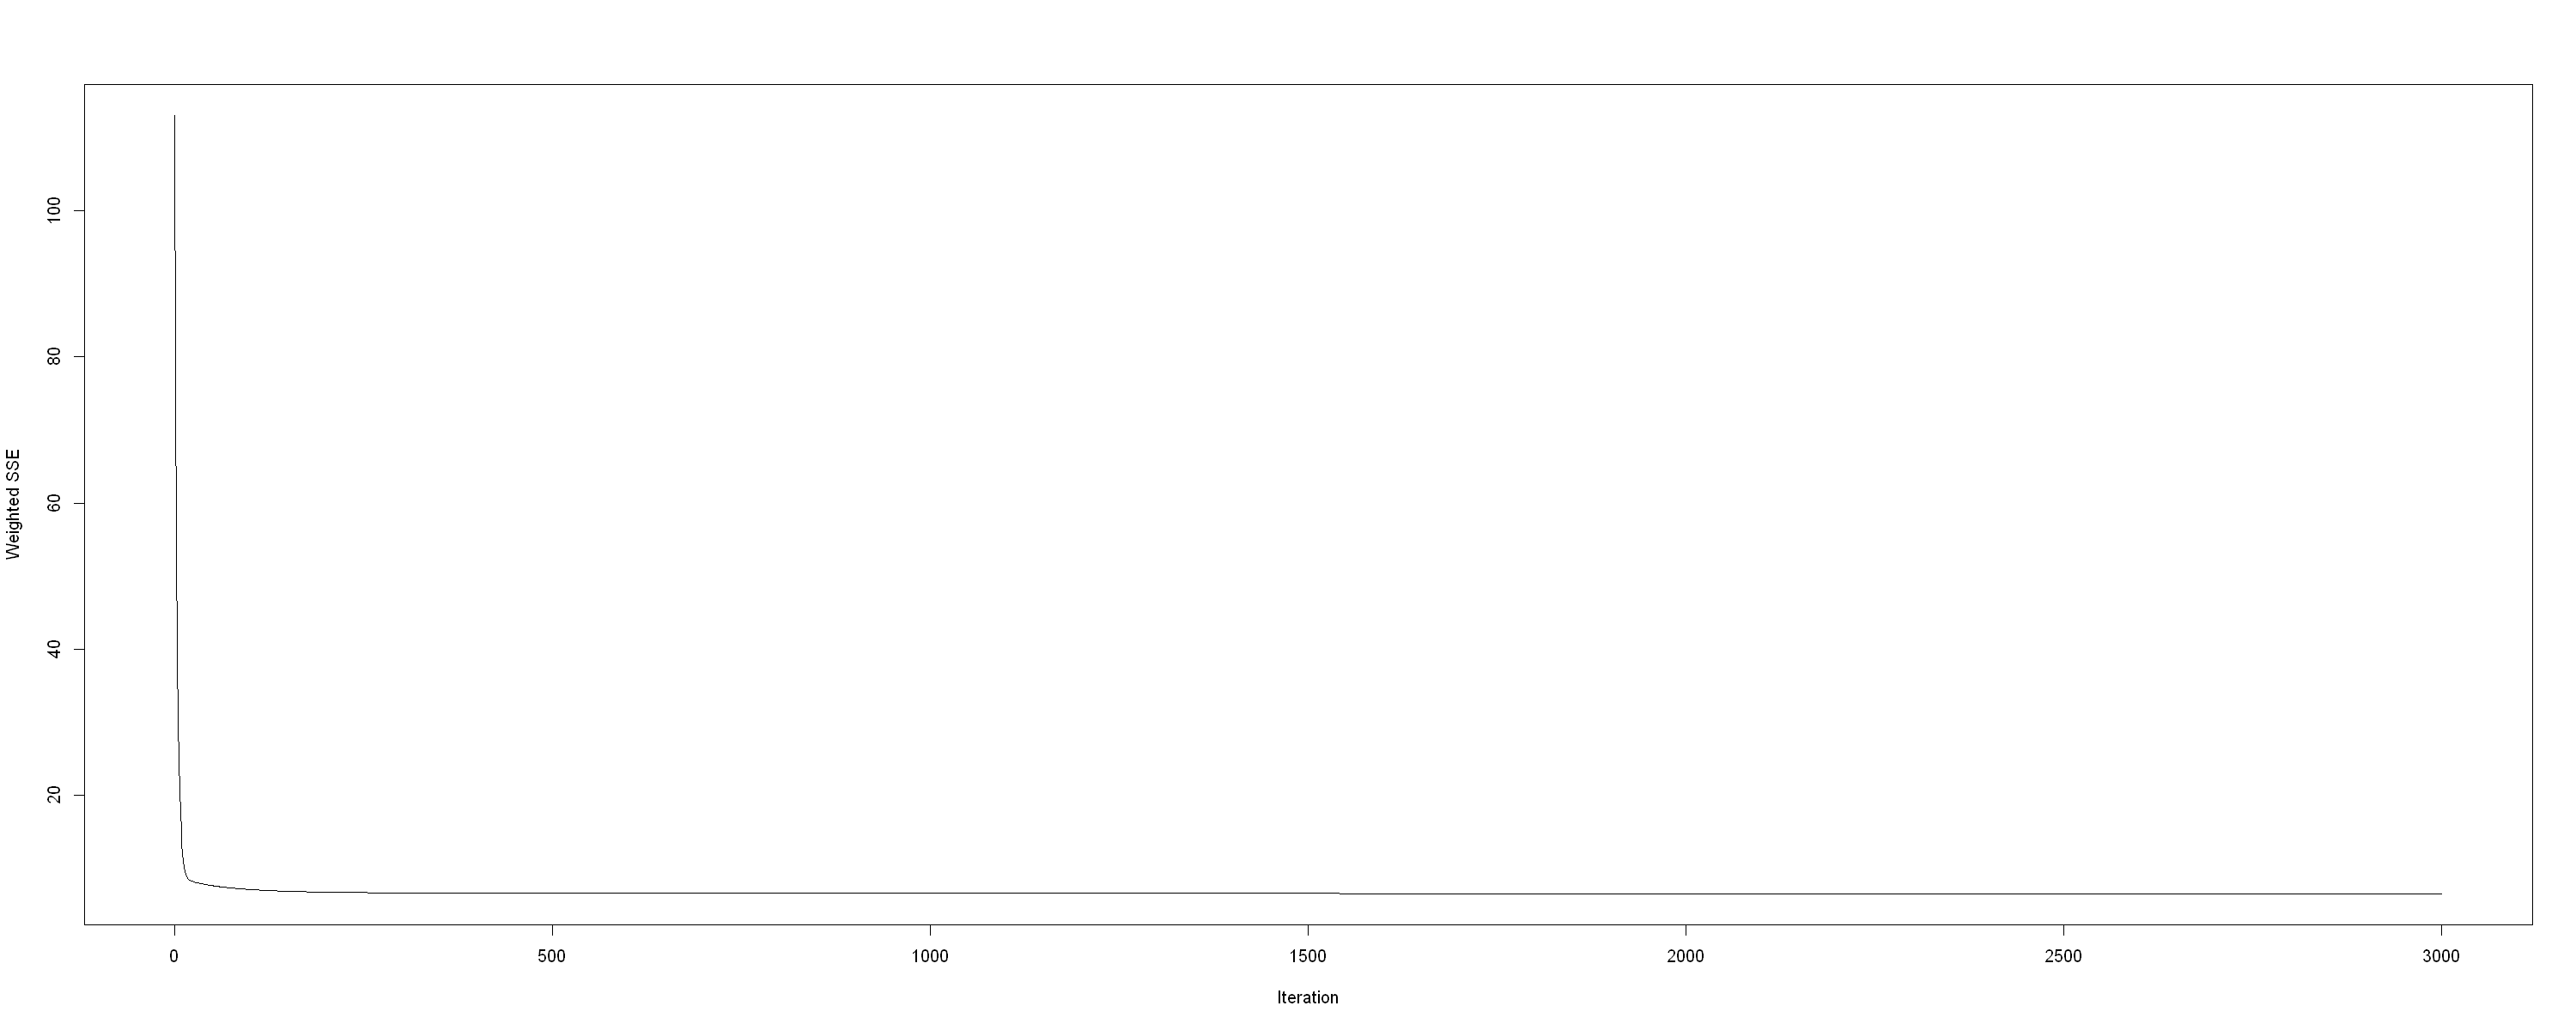

In [44]:
plotIterativeError(fit2)

In [45]:
out_r<-as.vector(outputs[-train])
head(out_r)

[1] 0.76 0.76 0.74 0.72 0.72 0.72

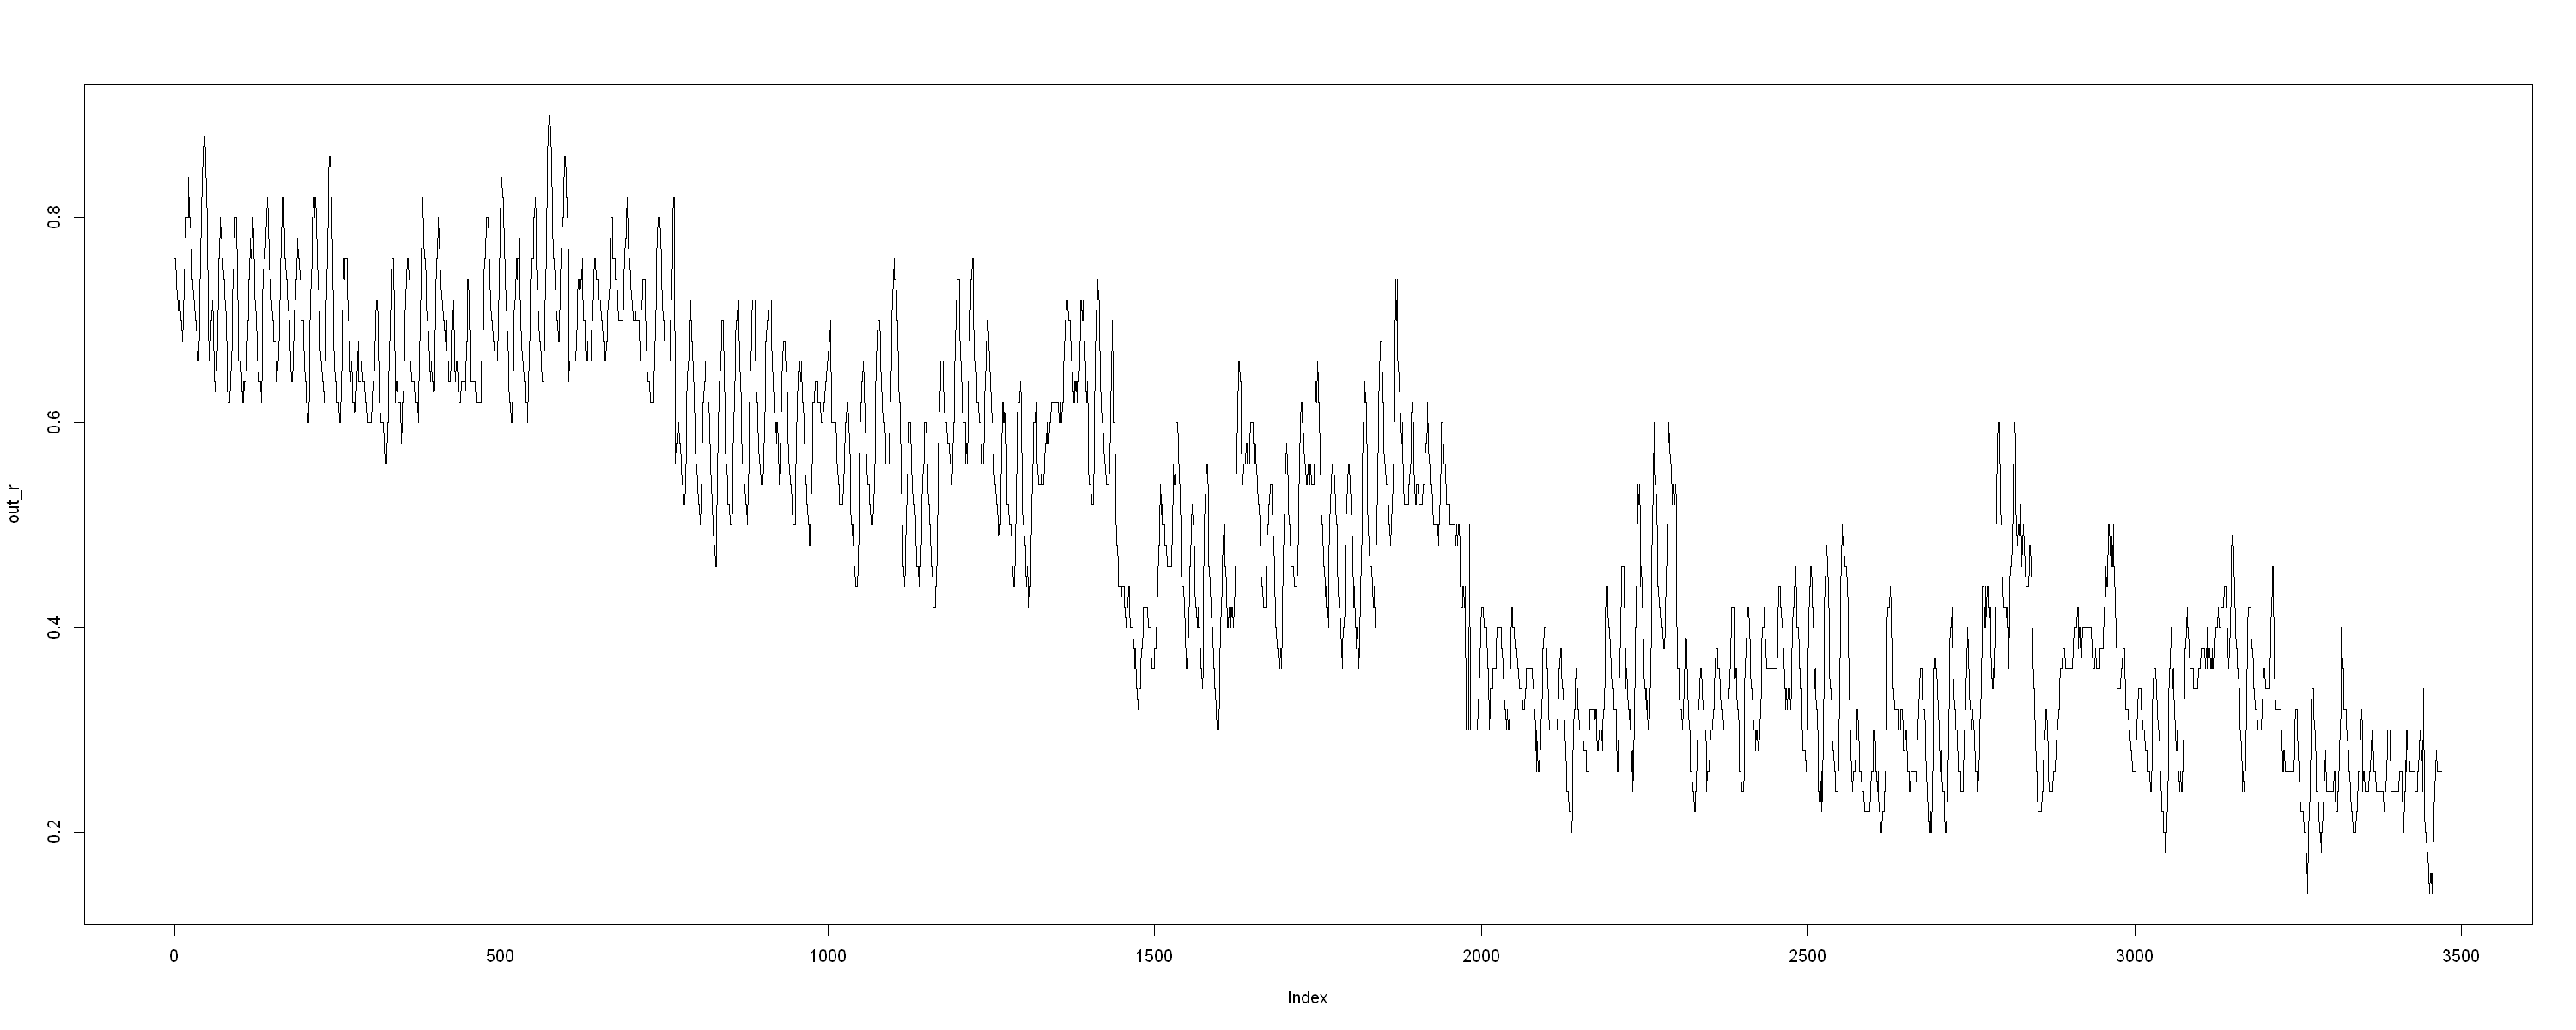

In [46]:
options(repr.plot.width=25, repr.plot.height=10)
plot(out_r,type="l")

13910,0.7686554
13911,0.7502025
13912,0.7501118
13913,0.7333440
13914,0.7144265
13915,0.7173756


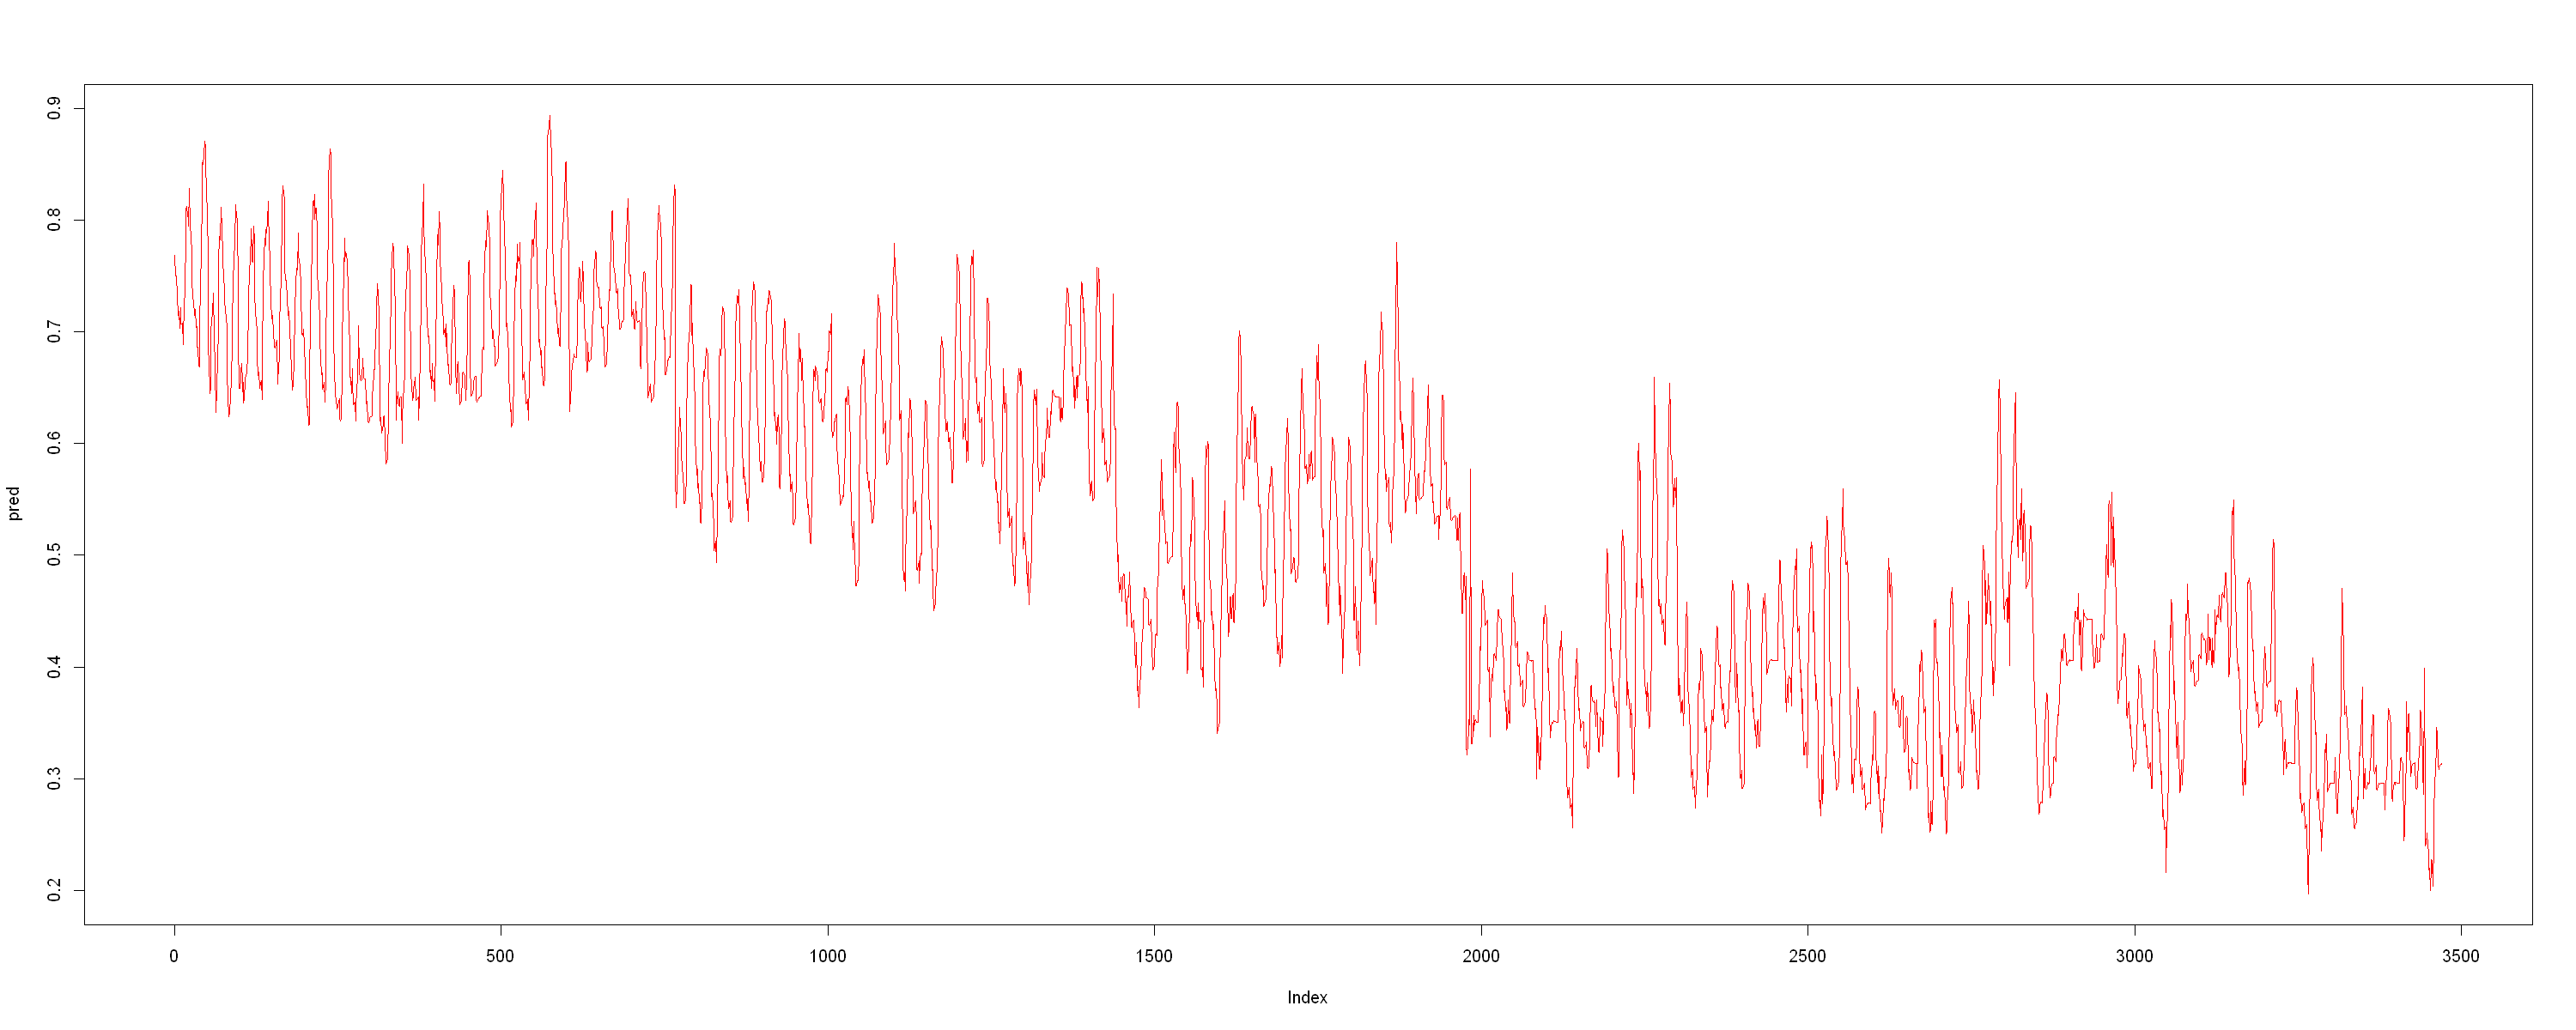

In [47]:
pred<-predict(fit2,inputs[-train])
plot(pred,col="red",type="l")
wynik<-data.frame(out_r,pred)
head(pred)

In [16]:
mse <- function(actual, predicted) {
  mean((actual - predicted)^2)
}

rmse <- function(actual, predicted) {
  sqrt(mse(actual, predicted))
}

mae <- function(actual, predicted) {
  mean(abs(actual - predicted))
}

r_squared <- function(actual, predicted) {
  ss_res <- sum((actual - predicted)^2)
  ss_tot <- sum((actual - mean(actual))^2)
  1 - (ss_res / ss_tot)
}

In [48]:
mse_value <- mse(wynik$out_r,wynik$pred)
rmse_value <- rmse(wynik$out_r,wynik$pred)
mae_value <- mae(wynik$out_r,wynik$pred)
r_squared_value <- r_squared(wynik$out_r,wynik$pred)

cat("Mean Squared Error (MSE):", mse_value, "\n")
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")
cat("Mean Absolute Error (MAE):", mae_value, "\n")
cat("R-squared:", r_squared_value, "\n")

Mean Squared Error (MSE): 0.001781915 
Root Mean Squared Error (RMSE): 0.04221274 
Mean Absolute Error (MAE): 0.03560295 
R-squared: 0.9381638 


In [54]:
head(wynik)

,out_r,pred
,<dbl>,<dbl>
13910,0.76,0.7686554
13911,0.76,0.7502025
13912,0.74,0.7501118
13913,0.72,0.7333440
13914,0.72,0.7144265
13915,0.72,0.7173756


In [55]:
wynik2<- data.frame(Index = 1:nrow(wynik),Rzeczywiste =wynik$out_r,Predykowane = wynik$pred)
head(wynik2)

,Index,Rzeczywiste,Predykowane
,<int>,<dbl>,<dbl>
1,1,0.76,0.7686554
2,2,0.76,0.7502025
3,3,0.74,0.7501118
4,4,0.72,0.7333440
5,5,0.72,0.7144265
6,6,0.72,0.7173756


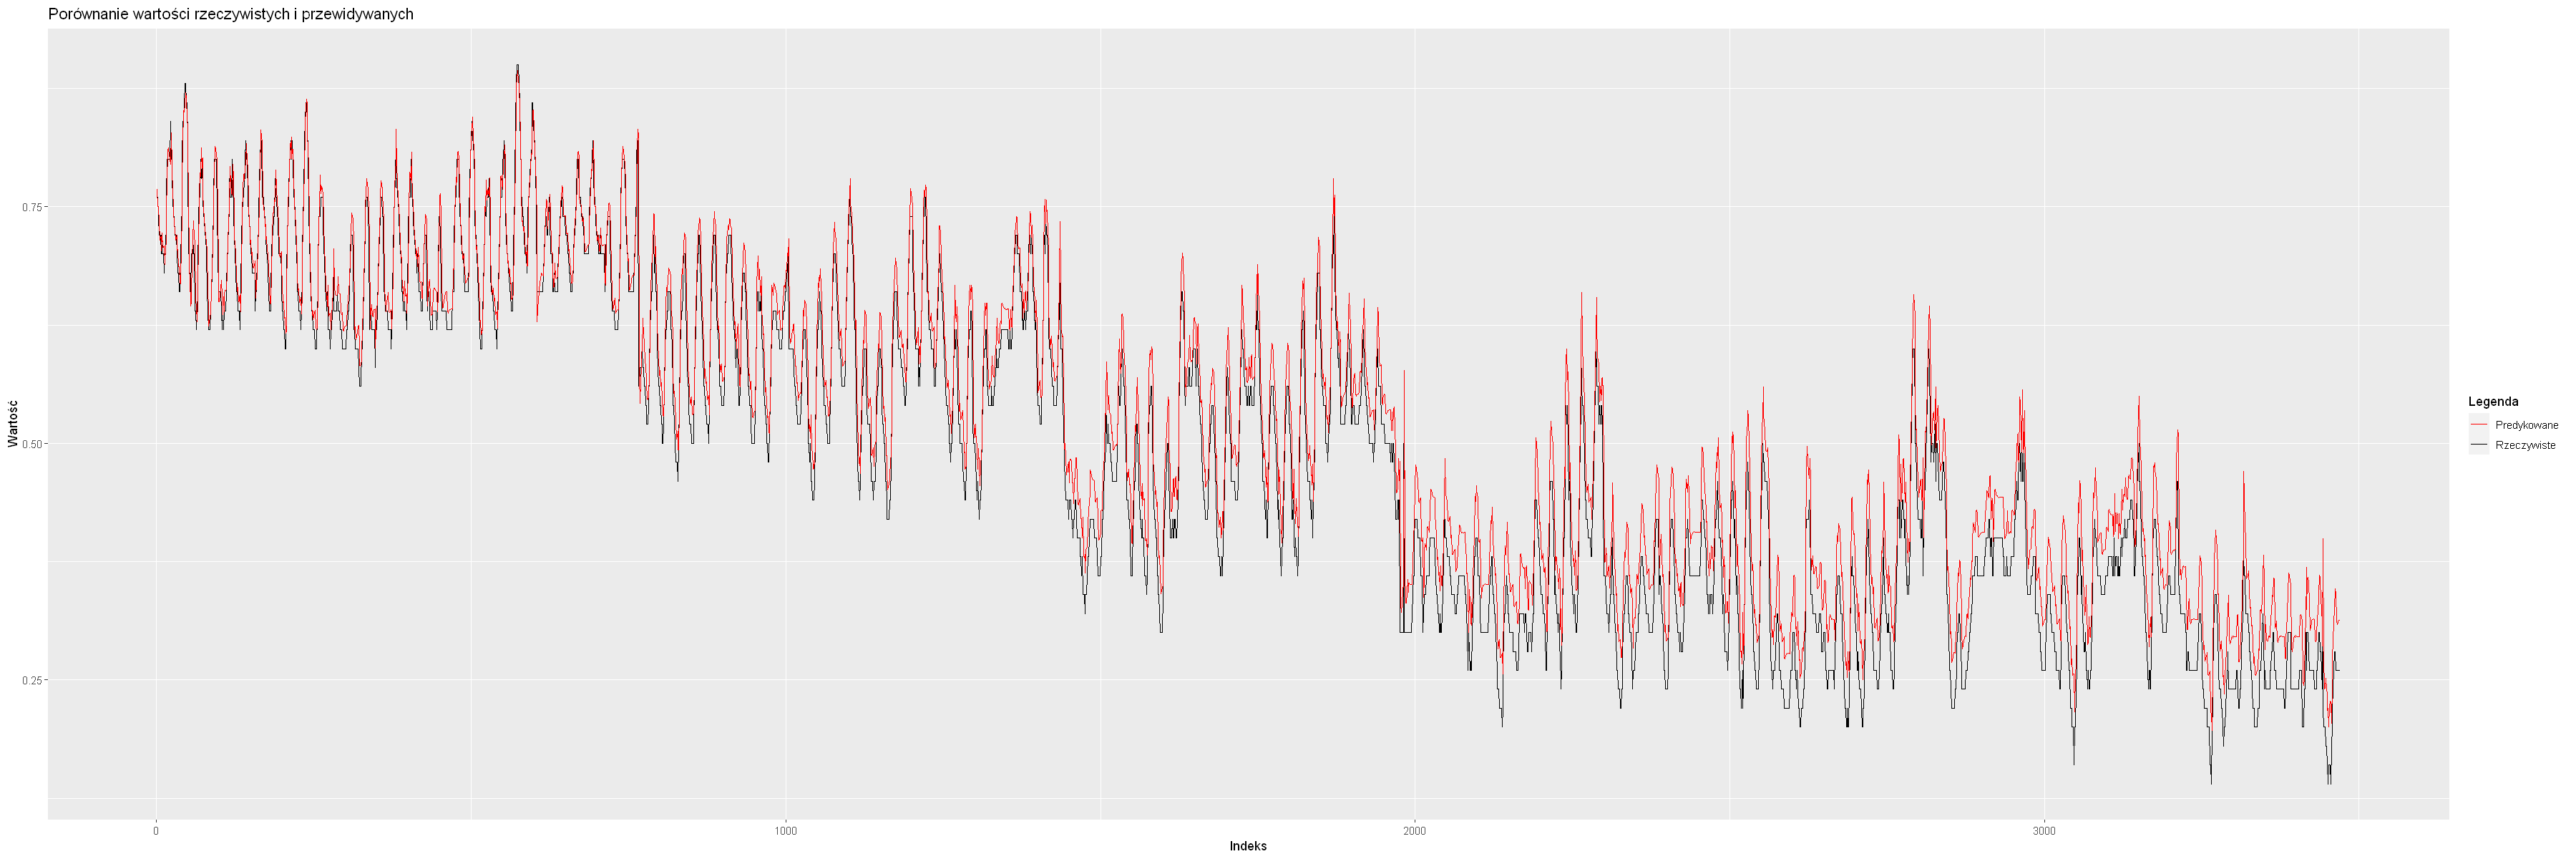

In [57]:
library(ggplot2)
options(repr.plot.width=30, repr.plot.height=10)
ggplot(wynik2, aes(x = Index)) +
  geom_line(aes(y = Rzeczywiste, color = "Rzeczywiste")) +   
  geom_line(aes(y = Predykowane, color = "Predykowane")) +  
  labs(title = "Porównanie wartości rzeczywistych i przewidywanych",
       x = "Indeks",
       y = "Wartość") +
  scale_color_manual(values = c("Rzeczywiste" = "black", "Predykowane" = "red"),
                     name = "Legenda")

Wnioski

Została utworzona sieć neuronowa rekurencyjna Elmana w oparciu o dwie wartwy ukrete, w których każda z ma 12 neuronów. Na podstawie powyższego porównania wartości rzczywistych z predykowanymi oraz współczników możemy stwierdzić, iż model jest całkiem przyzwoity do przewidywania temperatury. 
R^2 wynosi około 93% i jest miarą stopnia, w jakim model pasuje do próby. Średnia kwadratowa błedu, Średni błąd bezwzględny,Średni błąd kwadratowy są bliskie 0 co było zamierzone. 

Sieć JORDANA

In [1]:
rowery_hr <- read.csv("hour.csv")
head(rowery_hr)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


In [2]:
tempertaura<-as.numeric(rowery_hr$temp)
head(tempertaura)

[1] 0.24 0.22 0.22 0.24 0.24 0.24

In [3]:
train<-1:13903

In [5]:
library(readxl)
library(RSNNS)
library(quantmod)

In [6]:
y<-as.zoo(tempertaura)

In [7]:
x1<-Lag(y,k=1)
x2<-Lag(y,k=2)
x3<-Lag(y,k=3)
x4<-Lag(y,k=4)
x5<-Lag(y,k=5)
x6<-Lag(y,k=6)

In [8]:
temperatura_dataset<-cbind(y,x1,x2,x3,x4,x5,x6)

In [9]:
temperatura_dataset<-temperatura_dataset[-(1:6),]
head(temperatura_dataset)

      y Lag.1 Lag.2 Lag.3 Lag.4 Lag.5 Lag.6
7  0.22  0.24  0.24  0.24  0.22  0.22  0.24
8  0.20  0.22  0.24  0.24  0.24  0.22  0.22
9  0.24  0.20  0.22  0.24  0.24  0.24  0.22
10 0.32  0.24  0.20  0.22  0.24  0.24  0.24
11 0.38  0.32  0.24  0.20  0.22  0.24  0.24
12 0.36  0.38  0.32  0.24  0.20  0.22  0.24

In [10]:
inputs<-temperatura_dataset[,2:7]
outputs<-temperatura_dataset[,1]

In [23]:
jord_fit<-jordan(inputs[train],
           outputs[train],
           size=c(12),
           learnFuncParams=c(0.09),
           maxit=3000)

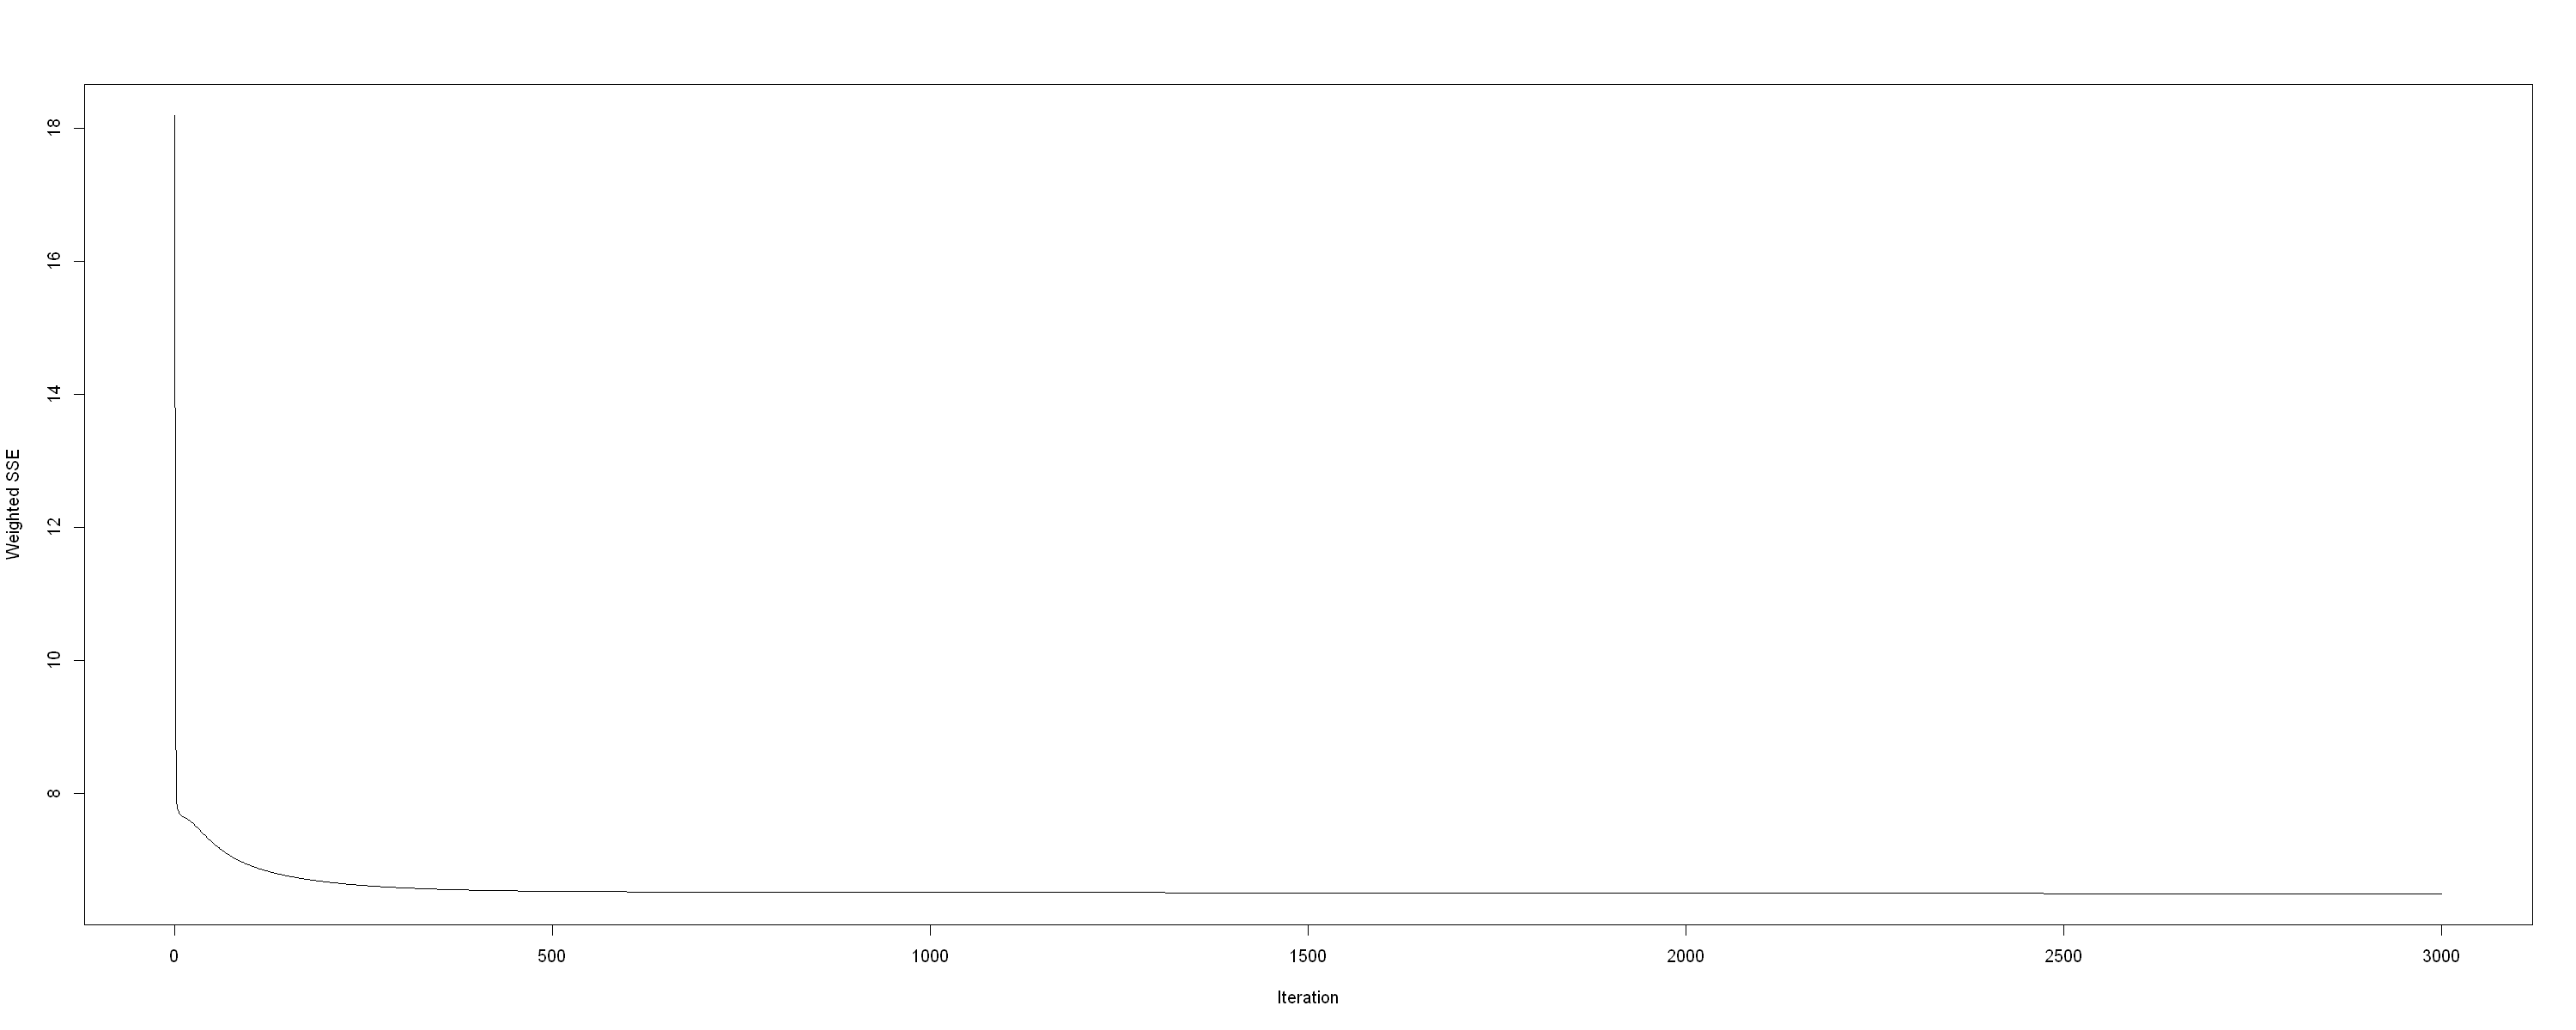

In [24]:
options(repr.plot.width=25, repr.plot.height=10)
plotIterativeError(jord_fit)

In [25]:
out_r<-as.vector(outputs[-train])
head(out_r)

[1] 0.76 0.76 0.74 0.72 0.72 0.72

In [26]:
pred<-predict(jord_fit,inputs[-train])
#plot(pred,col="red",type="l")
wynik<-data.frame(out_r,pred)

In [27]:
mse_value <- mse(wynik$out_r,wynik$pred)
rmse_value <- rmse(wynik$out_r,wynik$pred)
mae_value <- mae(wynik$out_r,wynik$pred)
r_squared_value <- r_squared(wynik$out_r,wynik$pred)

cat("Mean Squared Error (MSE):", mse_value, "\n")
cat("Root Mean Squared Error (RMSE):", rmse_value, "\n")
cat("Mean Absolute Error (MAE):", mae_value, "\n")
cat("R-squared:", r_squared_value, "\n")

Mean Squared Error (MSE): 0.002342345 
Root Mean Squared Error (RMSE): 0.04839778 
Mean Absolute Error (MAE): 0.04153789 
R-squared: 0.9187157 


In [28]:
wynik2<- data.frame(Index = 1:nrow(wynik),Rzeczywiste =wynik$out_r,Predykowane = wynik$pred)
head(wynik2)

,Index,Rzeczywiste,Predykowane
,<int>,<dbl>,<dbl>
1,1,0.76,0.7624885
2,2,0.76,0.7476721
3,3,0.74,0.7442198
4,4,0.72,0.7315065
5,5,0.72,0.7168959
6,6,0.72,0.7132225


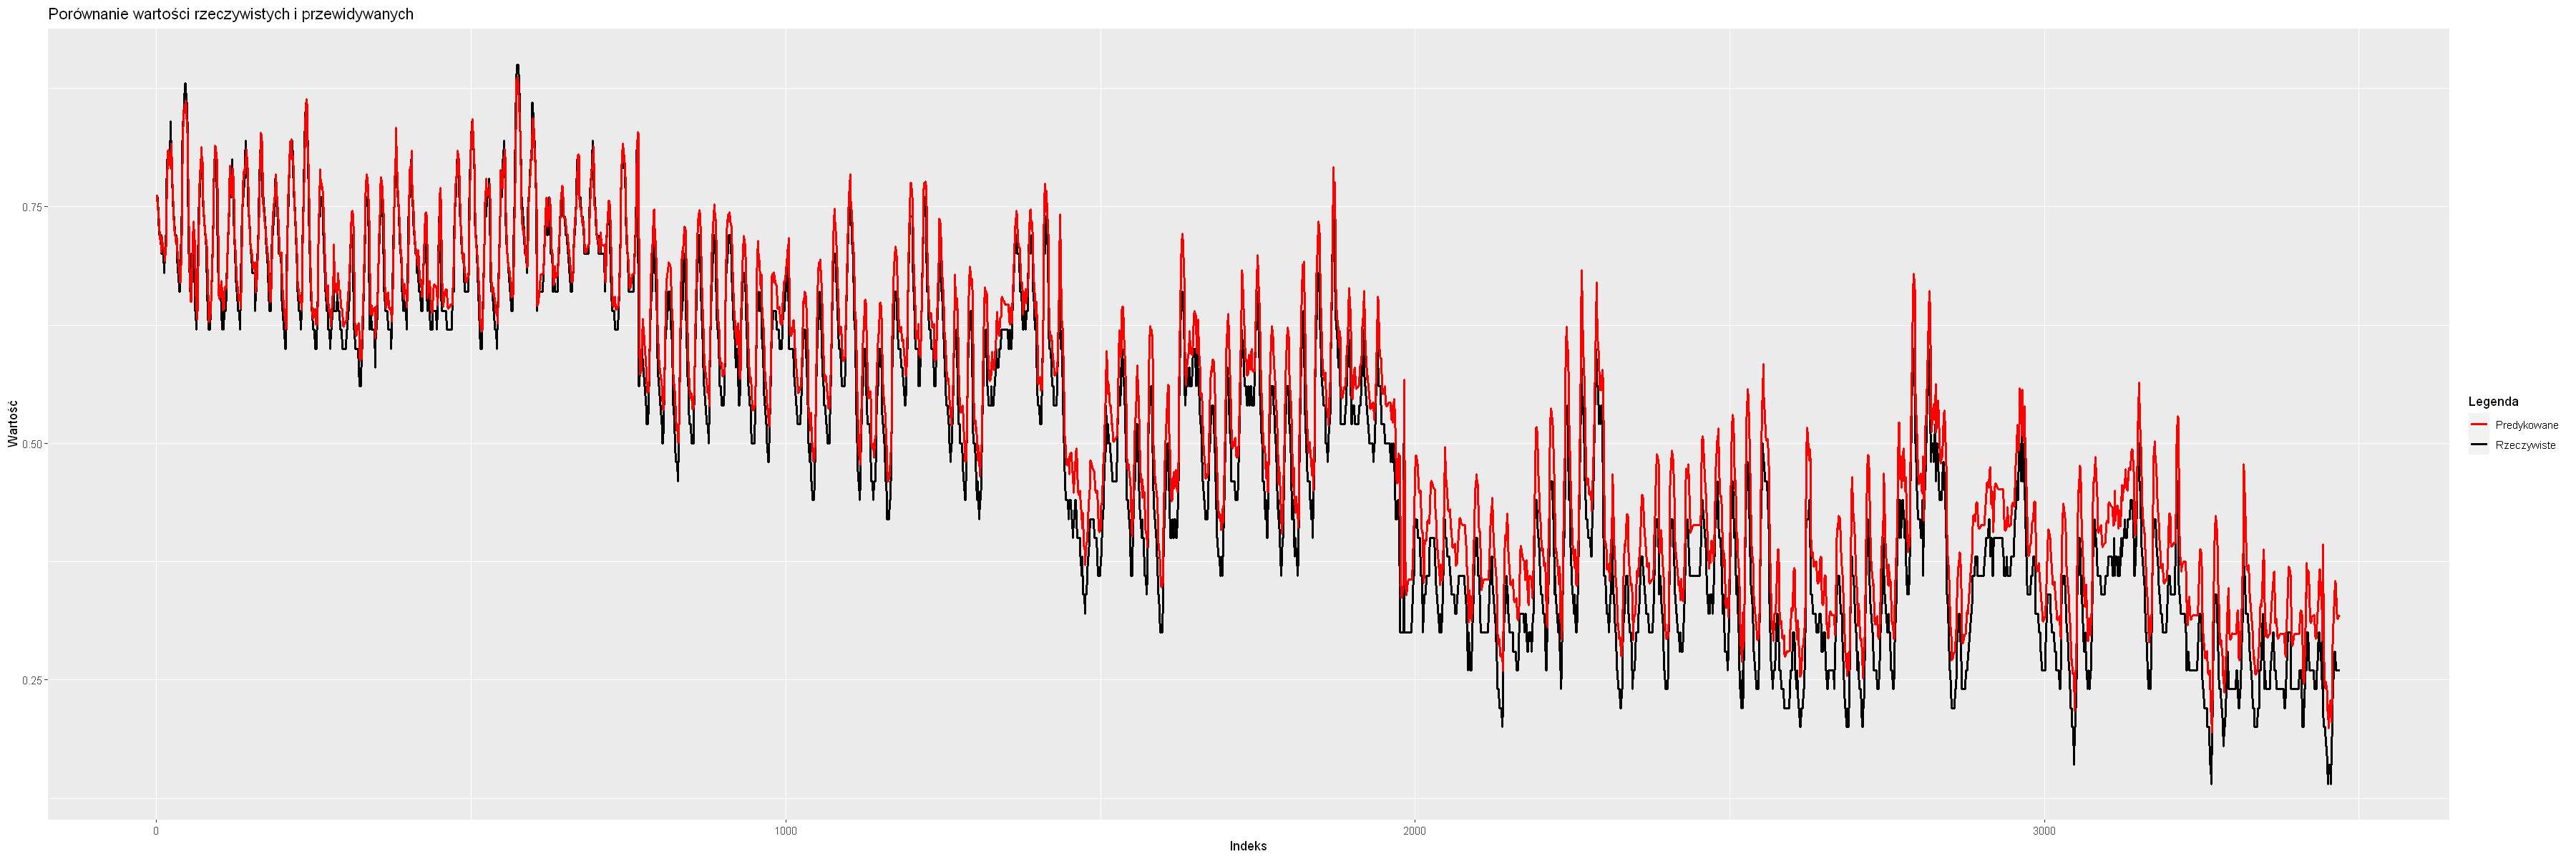

In [30]:
library(ggplot2)
options(repr.plot.width = 30, repr.plot.height = 10)

ggplot(wynik2, aes(x = Index)) +
  geom_line(aes(y = Rzeczywiste, color = "Rzeczywiste"), size = 1) + 
  geom_line(aes(y = Predykowane, color = "Predykowane"), size = 1) +
  labs(title = "Porównanie wartości rzeczywistych i przewidywanych",
       x = "Indeks",
       y = "Wartość") +
  scale_color_manual(values = c("Rzeczywiste" = "black", "Predykowane" = "red"),
                     name = "Legenda")

Wnioski 

Na podstawie opracowanego modelu sieci neuronowej rekurencyjne Jordana, możemy zauważyć, iż dla zadenego zbioru sieć Jordana powstała w oparciu o jedną wartwę ukrytą, w której jest 12 neuronów bardzo podonie się zachowuje do tej, która została w oparciu o sieć Elmana. Jej współczynnik determinacji wynosi około 92%, czyli bardzo dobrze dopasowywuje się do nowych danych.

### Wnioski 
Do postawionych zadań zostały wykonane sieci neuronowe. Współczynniki determinacji, Średnie kwadratowe błedów, Średnie błądy bezwzględne,Średnie błędy kwadratowe wskazują na to, iż modele wyszyły bardzo dobrze. Możemy to również zauważyć na wykresach przedstawiająch porównanie rzeczywistych danych ze zbioru walidacyjnego z predykowanymi